In [ ]:
!pip3 install pytesseract
!pip3 install imutils

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,472 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

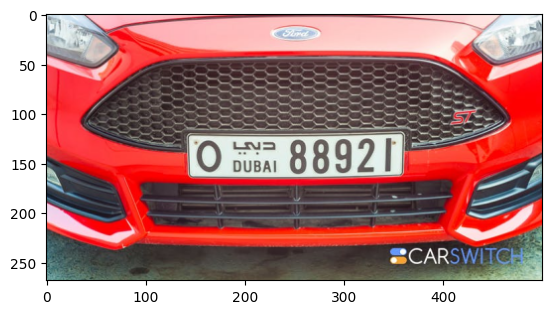

In [ ]:
image = cv2.imread('dxb.jpeg')
image = imutils.resize(image, width=500)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("1 - Grayscale Conversion", gray)

gray = cv2.bilateralFilter(gray, 11, 17, 17)
#cv2.imshow("2 - Bilateral Filter", gray)

edged = cv2.Canny(gray, 170, 200)
#cv2.imshow("4 - Canny Edges", edged)

In [ ]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None

count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            NumberPlateCnt = approx
            break


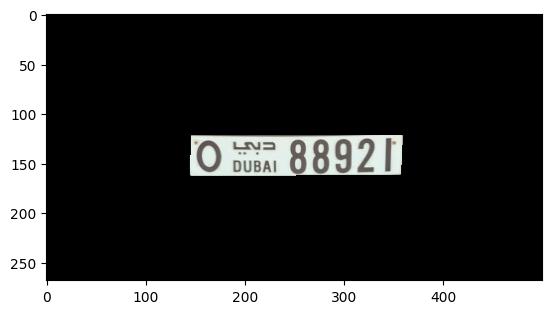

In [ ]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

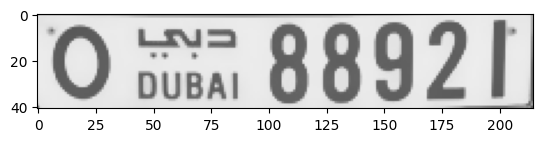

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
cropped_image = cv2.convertScaleAbs(cropped_image, alpha=1.5, beta=50)
#plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))
_, thresholded = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Noise reduction (Gaussian blur)
blurred = cv2.GaussianBlur(thresholded, (5, 5), 1)

# Dilation and Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilated = cv2.dilate(blurred, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

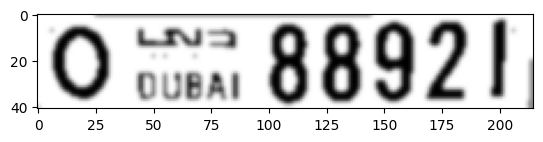

In [ ]:
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_RGB2BGR))

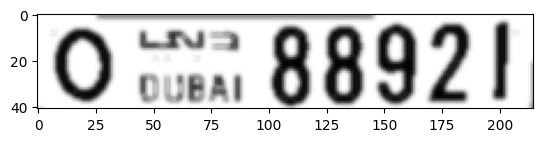

In [ ]:
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_RGB2BGR))

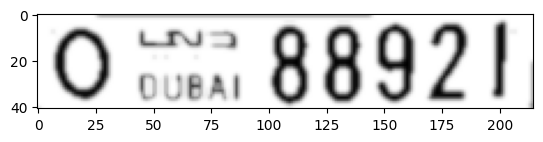

In [ ]:
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_RGB2BGR))

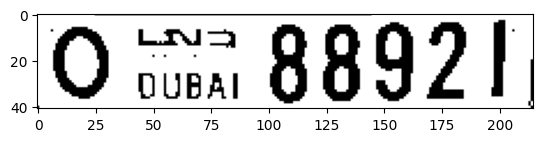

In [ ]:
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_RGB2BGR))

In [ ]:
result = pytesseract.image_to_string(dilated, config='--psm 7 digits',lang='eng')
print(result)

0-.88921



In [ ]:
result = pytesseract.image_to_string(eroded, config='--psm 7 digits',lang='eng')
print(result)

0-.88921



In [ ]:
result = pytesseract.image_to_string(thresholded, config='--psm 7 digits tessedit_char_whitelist=0123456789',lang='eng')
print(result)

88921



In [ ]:
result = pytesseract.image_to_string(thresholded, config='--psm 7 en ara')
print(result)

Or, 88921,



In [ ]:
pytesseract.image_to_data(thresholded)

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t215\t41\t-1\t\n'

In [ ]:
cv2.waitKey(0)

-1